In [1]:
import pandas as pd
from citipy import citipy
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
from datetime import datetime

In [2]:


lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)
coordinates

[(-6.448720652935805, -149.562402312995),
 (-58.62783693529593, 60.05114204968473),
 (-53.53781732975107, 140.91058612704518),
 (67.07746027069265, -160.85730637955982),
 (73.08971815775513, -127.8934659249949),
 (8.107562243441919, 174.26833294839804),
 (46.40840450951251, -96.05195484504702),
 (9.005957368235087, -122.98213983203084),
 (39.14542529003671, -119.86458524019966),
 (-84.0308035142965, -76.73212857064495),
 (76.11726606120354, 54.05799125365394),
 (-10.780824860752958, -44.870813332273514),
 (1.985153877993426, -41.407176187266344),
 (87.06129080943745, 176.4628167051007),
 (12.095610281318315, 14.046167319874883),
 (-57.82456697647647, 15.94791324257369),
 (-86.51027673643485, -36.404935241541494),
 (-59.871977997488294, 15.10460563051808),
 (42.49089114779113, 152.26207085967826),
 (-19.094435372808093, -88.59426871065563),
 (5.529411072541237, 5.823737431044918),
 (-86.25282491810209, 11.44151490887387),
 (-37.13813120724274, -120.82489886037966),
 (-89.26482091166716,

In [4]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)



619

In [5]:
city_data = []
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
record_count = 1
set_count = 1

print("Beginning Data Retrieval     ")
print("-----------------------------")

for i, city in enumerate(cities):
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    city_url = url + "&q=" + city.replace(" ","+")
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print(f"{city} not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | faanui
Processing Record 2 of Set 1 | taolanaro
taolanaro not found. Skipping...
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | nome
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | fergus falls
Processing Record 8 of Set 1 | cabo san lucas
Processing Record 9 of Set 1 | carson city
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | belushya guba
belushya guba not found. Skipping...
Processing Record 12 of Set 1 | formosa do rio preto
Processing Record 13 of Set 1 | tutoia
Processing Record 14 of Set 1 | leningradskiy
Processing Record 15 of Set 1 | bama
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | sentyabrskiy
sentyabrskiy not found. Skipping...
Processing Record 18 of Set 1 | pisco
Processing Record 19 of Set 1 | warri
Processing Record 20 of Set 1 | rik

Processing Record 36 of Set 4 | karamea
karamea not found. Skipping...
Processing Record 37 of Set 4 | sao jose da coroa grande
Processing Record 38 of Set 4 | mtwara
Processing Record 39 of Set 4 | rungata
rungata not found. Skipping...
Processing Record 40 of Set 4 | lubango
Processing Record 41 of Set 4 | bardiyah
Processing Record 42 of Set 4 | le port
Processing Record 43 of Set 4 | bengkulu
Processing Record 44 of Set 4 | lethem
Processing Record 45 of Set 4 | eyl
Processing Record 46 of Set 4 | bilibino
Processing Record 47 of Set 4 | qinzhou
Processing Record 48 of Set 4 | nikolskoye
Processing Record 49 of Set 4 | bathsheba
Processing Record 50 of Set 4 | fayaoue
Processing Record 1 of Set 5 | nuuk
Processing Record 2 of Set 5 | mahebourg
Processing Record 3 of Set 5 | hovd
Processing Record 4 of Set 5 | zachagansk
zachagansk not found. Skipping...
Processing Record 5 of Set 5 | tsihombe
tsihombe not found. Skipping...
Processing Record 6 of Set 5 | bolungarvik
bolungarvik not

Processing Record 27 of Set 8 | laguna
Processing Record 28 of Set 8 | abapo
Processing Record 29 of Set 8 | diamantino
Processing Record 30 of Set 8 | vanavara
Processing Record 31 of Set 8 | seminole
Processing Record 32 of Set 8 | belaya gora
Processing Record 33 of Set 8 | santa cruz
Processing Record 34 of Set 8 | maryborough
Processing Record 35 of Set 8 | saint-francois
Processing Record 36 of Set 8 | grindavik
Processing Record 37 of Set 8 | stavern
Processing Record 38 of Set 8 | loreto
Processing Record 39 of Set 8 | menongue
Processing Record 40 of Set 8 | homer
Processing Record 41 of Set 8 | manicore
Processing Record 42 of Set 8 | broome
Processing Record 43 of Set 8 | mount pleasant
Processing Record 44 of Set 8 | sassandra
Processing Record 45 of Set 8 | hay river
Processing Record 46 of Set 8 | kazerun
Processing Record 47 of Set 8 | prieska
Processing Record 48 of Set 8 | port augusta
Processing Record 49 of Set 8 | azuaga
Processing Record 50 of Set 8 | axim
Processi

Processing Record 16 of Set 12 | kushima
Processing Record 17 of Set 12 | merrill
Processing Record 18 of Set 12 | tarabuco
Processing Record 19 of Set 12 | hunza
hunza not found. Skipping...
Processing Record 20 of Set 12 | tumannyy
tumannyy not found. Skipping...
Processing Record 21 of Set 12 | coahuayana
Processing Record 22 of Set 12 | apopka
Processing Record 23 of Set 12 | honiara
Processing Record 24 of Set 12 | nola
Processing Record 25 of Set 12 | pakokku
Processing Record 26 of Set 12 | korla
Processing Record 27 of Set 12 | ayna
Processing Record 28 of Set 12 | humaita
Processing Record 29 of Set 12 | igarka
Processing Record 30 of Set 12 | agadez
Processing Record 31 of Set 12 | severo-kurilsk
Processing Record 32 of Set 12 | upata
Processing Record 33 of Set 12 | ekhabi
Processing Record 34 of Set 12 | lieto
Processing Record 35 of Set 12 | balgazyn
Processing Record 36 of Set 12 | barroso
Processing Record 37 of Set 12 | mantua
Processing Record 38 of Set 12 | chicama
Pr

In [6]:
len(city_data)

572

In [7]:
city_data_df = pd.DataFrame(city_data)

In [8]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Faanui,-16.48,-151.75,80.78,73,77,8.16,PF,2020-11-23 17:10:04
1,New Norfolk,-42.78,147.06,54.00,63,99,2.48,AU,2020-11-23 17:10:04
2,Nome,64.50,-165.41,26.60,92,90,6.93,US,2020-11-23 17:10:04
3,Tuktoyaktuk,69.45,-133.04,-2.20,84,40,13.87,CA,2020-11-23 17:10:04
4,Butaritari,3.07,172.79,81.30,75,70,10.27,KI,2020-11-23 17:10:04


In [9]:
city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]

In [10]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Faanui,PF,2020-11-23 17:10:04,-16.48,-151.75,80.78,73,77,8.16
1,New Norfolk,AU,2020-11-23 17:10:04,-42.78,147.06,54.00,63,99,2.48
2,Nome,US,2020-11-23 17:10:04,64.50,-165.41,26.60,92,90,6.93
3,Tuktoyaktuk,CA,2020-11-23 17:10:04,69.45,-133.04,-2.20,84,40,13.87
4,Butaritari,KI,2020-11-23 17:10:04,3.07,172.79,81.30,75,70,10.27
...,...,...,...,...,...,...,...,...,...
567,Ingham,US,2020-11-23 17:10:46,42.60,-84.38,42.80,71,75,12.75
568,Acarau,BR,2020-11-23 17:10:46,-2.89,-40.12,87.78,56,98,19.60
569,Kendari,ID,2020-11-23 17:10:47,-3.94,122.50,75.76,90,100,4.74
570,Japura,ID,2020-11-23 17:10:47,-0.32,102.35,73.42,98,99,1.90


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
import time

today = time.time()

In [15]:
today

1606151487.2452211

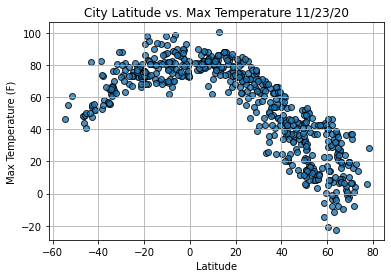

In [16]:
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

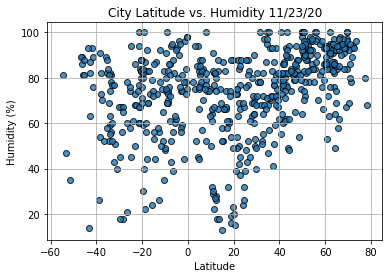

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

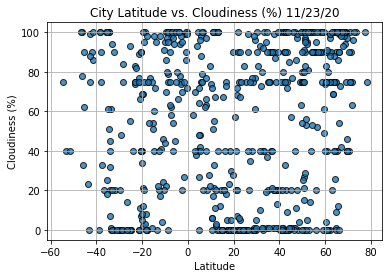

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

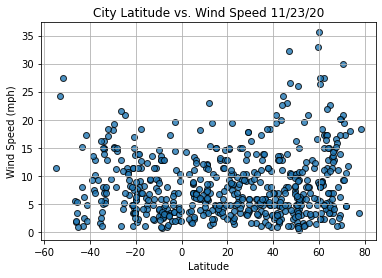

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()